## Robot Init

In [6]:
from RobotInit import RobotInitPos

RobotInitPos("192.168.88.13")

tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 44
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 68
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1092
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1418


RobotException: Robot stopped

## Orient Val 3D

In [1]:
import urx
import numpy as np
import time
from math import isclose
import matplotlib.pyplot as plt

from scipy.spatial.transform import Rotation as R
import math3d

import cv2

import sys
sys.path.append('..')

from utils.orientation.OrientEstimation import OrientEstimation
from utils.setup.setup import SetUp
from utils.support import*

rob = urx.Robot("192.168.88.13")

tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 68
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1092
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1418


In [2]:
th = 0.2

gt = []

Roll, Pitch, Yaw = [],[],[]

In [3]:
class picture():
    
    def __init__(self):
        self.hands, self.mpDraw, self.mpHands = SetUp.mediapipe()
        self.pipeline, self.config, self.align = SetUp.camera(640, 480, 60)
        self.OrientEstimation = OrientEstimation(640, 480)
        
        self.pipeline.start(self.config)
        try:
            self.pipeline.start(self.config)
        except:
            self.pipeline.stop()
            self.pipeline.start(self.config)
        

    def start(self):
        frames = self.pipeline.wait_for_frames()
        frames = self.align.process(frames)
        depth_frame = frames.get_depth_frame()
        color_frame = frames.get_color_frame()

        depth_image = np.asanyarray(depth_frame.get_data())
        color_image = np.asanyarray(color_frame.get_data())
    

        dr_info = DrawInfo(color_image)

        coordinates = self.hands.process(color_image).multi_hand_landmarks
        if coordinates:
            list_for_coordinates = []
            for handLms in coordinates:
                rect = Bounding_Rect(color_image, handLms)
                brect, image = rect.draw()

            self.mpDraw.draw_landmarks(color_image, handLms, self.mpHands.HAND_CONNECTIONS)

            R,P,Y = self.OrientEstimation.OrientStart(color_image, depth_image, handLms)
            cv2.imshow('RealSense', color_image)
            cv2.waitKey(1)

            return R,P,Y

        cv2.imshow('RealSense', color_image)
        cv2.waitKey(1)
        
        return 0,0,0

In [4]:
p = picture()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [5]:
# for i in range(200):
#     hand_r,hand_p,hand_y = p.start()
    

try:
    eur = R.from_euler("x", [0.2])
    mat = eur.as_matrix()[0]
    rob.set_orientation(mat)
except:  
    r_gt = 100 
    while not isclose(0.2, r_gt, rel_tol=1e-3):
        mat = R.from_matrix(rob.get_orientation().array)
        pos = mat.as_euler("xyz")
        r_gt = pos[0]
        gt.append(pos)
        hand_r,hand_p,hand_y = p.start()
        Roll.append(hand_r)
        Pitch.append(hand_p)
        Yaw.append(hand_y)
        
               
        
try:
    eur = R.from_euler("y", [0.2])
    mat = eur.as_matrix()[0]
    rob.set_orientation(mat)
except:  
    r_gt = 100 
    while not isclose(0.2, r_gt, rel_tol=1e-3):
        mat = R.from_matrix(rob.get_orientation().array)
        pos = mat.as_euler("xyz")
        r_gt = pos[1]
        gt.append(pos)
        hand_r,hand_p,hand_y = p.start()
        Roll.append(hand_r)
        Pitch.append(hand_p)
        Yaw.append(hand_y)
        
        
        
# try:
#     eur = R.from_euler("z", [0.2])
#     mat = eur.as_matrix()[0]
#     rob.set_orientation(mat)
# except:  
#     r_gt = 100 
#     while not isclose(0.2, r_gt, rel_tol=1e-3):
#         mat = R.from_matrix(rob.get_orientation().array)
#         pos = mat.as_euler("xyz")
#         r_gt = pos[2]
#         gt.append(pos)
#         hand_r,hand_p,hand_y = p.start()
#         Roll.append(hand_r)
#         Pitch.append(hand_p)
#         Yaw.append(hand_y)
        
        
        
        
# try:
#     eur = R.from_euler("y", [0])
#     mat = eur.as_matrix()[0]
#     rob.set_orientation(mat)
# except:  
#     r_gt = 100 
#     while not isclose(0, r_gt, rel_tol=1e-3):
#         mat = R.from_matrix(rob.get_orientation().array)
#         pos = mat.as_euler("xyz")
#         r_gt = pos[1]
#         gt.append(pos)
#         hand_r,hand_p,hand_y = p.start()
#         Roll.append(hand_r)
#         Pitch.append(hand_p)
#         Yaw.append(hand_y)
        
        
# try:
#     eur = R.from_euler("x", [0])
#     mat = eur.as_matrix()[0]
#     rob.set_orientation(mat)
# except:  
#     r_gt = 100 
#     while not isclose(0, r_gt, rel_tol=1e-3):
#         mat = R.from_matrix(rob.get_orientation().array)
#         pos = mat.as_euler("xyz")
#         r_gt = pos[0]
#         gt.append(pos)
#         hand_r,hand_p,hand_y = p.start()
#         Roll.append(hand_r)
#         Pitch.append(hand_p)
#         Yaw.append(hand_y)
        
        

# try:
#     eur = R.from_euler("z", [0])
#     mat = eur.as_matrix()[0]
#     rob.set_orientation(mat)
# except:  
#     r_gt = 100 
#     while not isclose(0, r_gt, rel_tol=1e-3):
#         mat = R.from_matrix(rob.get_orientation().array)
#         pos = mat.as_euler("xyz")
#         r_gt = pos[2]
#         gt.append(pos)
#         hand_r,hand_p,hand_y = p.start()
#         Roll.append(hand_r)
#         Pitch.append(hand_p)
#         Yaw.append(hand_y)
        
        
cv2.destroyAllWindows()

In [21]:
eur = R.from_euler("x", [0.2, 0, 0])
mat = eur.as_matrix()

In [22]:
mat

array([[[ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.98006658, -0.19866933],
        [ 0.        ,  0.19866933,  0.98006658]],

       [[ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ]]])

In [19]:
eur = R.from_euler("x", [0.2, 0.2, 0.2])
mat = eur.as_matrix()

In [20]:
mat

array([[[ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.98006658, -0.19866933],
        [ 0.        ,  0.19866933,  0.98006658]],

       [[ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.98006658, -0.19866933],
        [ 0.        ,  0.19866933,  0.98006658]],

       [[ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.98006658, -0.19866933],
        [ 0.        ,  0.19866933,  0.98006658]]])

In [23]:
eur = R.from_euler("x", [0.2])
mat = eur.as_matrix()

In [24]:
mat

array([[[ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.98006658, -0.19866933],
        [ 0.        ,  0.19866933,  0.98006658]]])

In [7]:
gt = np.array(gt)

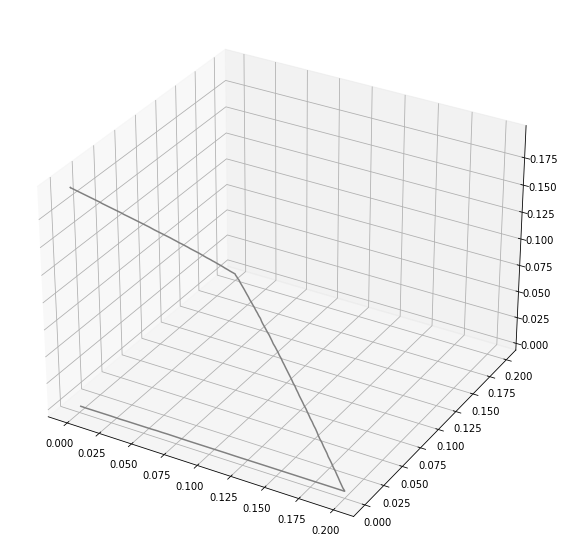

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/lena/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/home/lena/anaconda3/lib/python3.9/site-packages/urx/ursecmon.py", line 286, in run
    data = self._get_data()
  File "/home/lena/anaconda3/lib/python3.9/site-packages/urx/ursecmon.py", line 333, in _get_data
    tmp = self._s_secondary.recv(1024)
socket.timeout: timed out


In [8]:
ax = plt.axes(projection='3d')

ax.plot3D(gt[:,0],gt[:,1],gt[:,2], 'gray')

ax.figure.set_size_inches(10,10)

array([-0.00041721, -0.00041721, -0.00030984, -0.00030984,  0.00036051,
        0.00036051,  0.0013171 ,  0.0013171 ,  0.00275284,  0.0042588 ,
        0.0042588 ,  0.0065543 ,  0.0065543 ,  0.00904146,  0.00904146,
        0.01206655,  0.01206655,  0.01539049,  0.01539049,  0.01919148,
        0.01919148,  0.02317377,  0.02317377,  0.02734606,  0.02734606,
        0.03095522,  0.03095522,  0.0352592 ,  0.0352592 ,  0.03895279,
        0.03895279,  0.04304071,  0.04304071,  0.04699751,  0.05119273,
        0.05119273,  0.05496929,  0.05496929,  0.05924798,  0.05924798,
        0.0633354 ,  0.0674234 ,  0.0674234 ,  0.07141405,  0.07141405,
        0.07520253,  0.07931339,  0.07931339,  0.08298076,  0.08298076,
        0.08748637,  0.08748637,  0.09144075,  0.09144075,  0.09528788,
        0.09929105,  0.09929105,  0.10353204,  0.10353204,  0.10729371,
        0.11158292,  0.11158292,  0.11535803,  0.11932338,  0.11932338,
        0.12310988,  0.12310988,  0.12731369,  0.12731369,  0.13

In [7]:
import urx
import numpy as np
from scipy.spatial.transform import Rotation as R
import math3d

rob = urx.Robot("192.168.88.13")

tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 44
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 68
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1092
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1418


In [16]:
eur = R.from_euler("y", [0.2])
mat = eur.as_matrix()[0]
mat = mat.reshape(3,3)

In [17]:
rob.set_orientation(mat)

RobotException: Robot stopped

In [4]:
## x x pitch
q = Euler_to_quaternion(0, -0.3, 0)

In [5]:
r = R.from_quat(q)

In [6]:
rot_mat = r.as_matrix()

i = 0
if i==0:
    rot_mat[1,1] *= -1
    rot_mat[2,2] *= -1
    
    i+=1
    
    
np.round(rot_mat, 2)

array([[ 0.96,  0.  , -0.3 ],
       [ 0.  ,  1.  , -0.  ],
       [-0.3 ,  0.  ,  0.96]])

In [10]:
np.round(rob.get_orientation().array, 2)

array([[ 0.94, -0.  , -0.34],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.34, -0.  ,  0.94]])

In [8]:
orient = math3d.Orientation(rot_mat)

In [9]:
rob.set_orientation(orient)

RobotException: Robot stopped

## Orient Eval

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urx
import cv2

import sys
sys.path.append('..')

from utils.orientation.OrientEstimation import OrientEstimation
from utils.setup.setup import SetUp
from utils.support import*

In [2]:
rob = urx.Robot("192.168.88.131")
hands, mpDraw, mpHands = SetUp.mediapipe()
W = 640
H = 480
pipeline, config, align = SetUp.camera(640, 480, 60)
# cvFpsCalc = CvFpsCalc(buffer_len=10)
# poseEstimation = PoseEstimation(640, 480)
orientEstimation = OrientEstimation(640, 480)

try:
    pipeline.start(config)
except:
    pipeline.stop()
    pipeline.start(config)

times = 0   
Roll, Pitch, Yaw = [],[],[]
GT = []
while times < 350:
    # fps = cvFpsCalc.get()

    frames = pipeline.wait_for_frames()
    frames = align.process(frames)
    depth_frame = frames.get_depth_frame()
    color_frame = frames.get_color_frame()

    depth_image = np.asanyarray(depth_frame.get_data())
    color_image = np.asanyarray(color_frame.get_data())

    dr_info = DrawInfo(color_image)

    coordinates = hands.process(color_image).multi_hand_landmarks
    if coordinates:
        list_for_coordinates = []
        for handLms in coordinates:
            rect = Bounding_Rect(color_image, handLms)
            brect, image = rect.draw()

        mpDraw.draw_landmarks(color_image, handLms, mpHands.HAND_CONNECTIONS)

        # poseEstimation.PoseStart(handLms, depth_image)
        R,P,Y = orientEstimation.OrientStart(color_image, depth_image, handLms)
        orient = rob.get_orientation()
        times += 1
        
        Roll.append(R)
        Pitch.append(P)
        Yaw.append(Y)
        
        GT.append(orient)


    # dr_info.FPS(fps)
    cv2.imshow('RealSense', color_image)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        pipeline.stop()
        break
        
cv2.destroyAllWindows()
pipeline.stop()

tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1013
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1418
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [3]:
q0 = np.array([O.get_quaternion()[0] for O in GT])
q1 = np.array([O.get_quaternion()[1] for O in GT])
q2 = np.array([O.get_quaternion()[2] for O in GT])
q3 = np.array([O.get_quaternion()[3] for O in GT])

In [4]:
gt_Pitch = np.arctan2(2*(q0*q1+q2*q3), 1-2*((q1**2)+(q2**2))) * 180/np.pi
gt_Yaw = np.arcsin(2*(q0*q2-q3*q1)) * 180/np.pi
gt_Roll = np.arctan2(2*(q0*q3+q1*q2), 1-2*((q2**2)+(q3**2))) * 180/np.pi

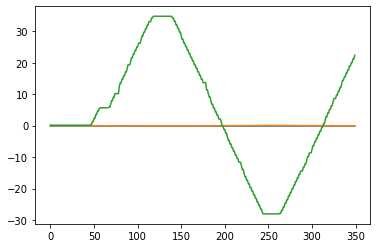

In [5]:
plt.plot(gt_Roll)
plt.plot(gt_Pitch)
plt.plot(gt_Yaw)

In [2]:
plt.plot(Roll)
plt.plot(Pitch)
plt.plot(Yaw)

NameError: name 'plt' is not defined

In [7]:
# np.save("Pitch/handR", R)
# np.save("Pitch/handP", P)
# np.save("Pitch/handY", Y)

# np.save("Pitch/robotR", gt_Roll)
# np.save("Pitch/robotP", GT_P)
# np.save("Pitch/robotY", GT_Y)


# np.save("Yaw/handR", Roll)
# np.save("Yaw/handP", Pitch)
# np.save("Yaw/handY", Yaw)

# np.save("Yaw/robotR", gt_Roll)
# np.save("Yaw/robotP", gt_Pitch)
# np.save("Yaw/robotY", gt_Yaw)

# np.save("Yaw/handR", R)
# np.save("Yaw/handP", P)
# np.save("Yaw/handY", Y)

# np.save("Yaw/robotR", GT_R)
# np.save("Yaw/robotP", GT_P)
# np.save("Yaw/robotY", GT_Y)

In [5]:
R = np.array(Roll[50:])
P = np.array(Pitch[50:])
Y = np.array(Yaw[50:])

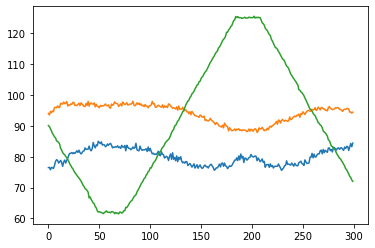

In [6]:
plt.plot(R)
plt.plot(P)
plt.plot(Y)

plt.show()

In [7]:
GT_R = np.array([O.get_quaternion()[3] for O in GT])
GT_P = np.array([O.get_quaternion()[1] for O in GT])
GT_Y = np.array([O.get_quaternion()[2] for O in GT])

GT_R = GT_R[50:]
GT_P = GT_P[50:]
GT_Y = GT_Y[50:]

In [42]:
def Norm(Roll, Pith, Yaw):

    Min = np.array([Roll.min(), Pith.min(), Yaw.min()])
    min_value = Min[np.argmin(Min)]

    Max = np.array([Roll.max(), Pith.max(), Yaw.max()])
    max_value = Max[np.argmax(Min)]


    Roll_nporm = Roll.copy()
    Roll_nporm -= min_value
    Roll_nporm /= max_value

    Pith_nporm = Pith.copy()
    Pith_nporm -= min_value
    Pith_nporm /= max_value

    Yaw_nporm = Yaw.copy()
    Yaw_nporm -= min_value
    Yaw_nporm /= max_value
    
    return Roll_nporm, Pith_nporm, Yaw_nporm


N_R, N_P, N_Y = Norm(R, P, Y)
N_GT_R, N_GT_P, N_GT_Y = Norm(GT_R, GT_P, GT_Y)

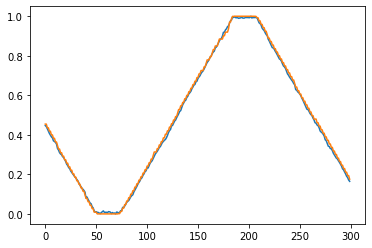

In [8]:
normP = Y.copy()
normGtP = GT_Y.copy()


normP -= normP.min()
normP /= normP.max()

# normGtP *= -1
normGtP -= normGtP.min()
normGtP /= normGtP.max()

plt.plot(normP)
plt.plot(normGtP)

plt.show()

In [9]:
# np.save("Pitch/handR", R)
# np.save("Pitch/handP", P)
# np.save("Pitch/handY", Y)

# np.save("Pitch/robotR", GT_R)
# np.save("Pitch/robotP", GT_P)
# np.save("Pitch/robotY", GT_Y)


# np.save("Roll/handR", R)
# np.save("Roll/handP", P)
# np.save("Roll/handY", Y)

# np.save("Roll/robotR", GT_R)
# np.save("Roll/robotP", GT_P)
# np.save("Roll/robotY", GT_Y)

# np.save("Yaw/handR", R)
# np.save("Yaw/handP", P)
# np.save("Yaw/handY", Y)

# np.save("Yaw/robotR", GT_R)
# np.save("Yaw/robotP", GT_P)
# np.save("Yaw/robotY", GT_Y)

Exception in thread Thread-5:
Exception in thread Thread-6Traceback (most recent call last):
  File "/home/lena/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
:
Traceback (most recent call last):
  File "/home/lena/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/home/lena/anaconda3/lib/python3.9/site-packages/urx/ursecmon.py", line 286, in run
    data = self._get_data()
  File "/home/lena/anaconda3/lib/python3.9/site-packages/urx/ursecmon.py", line 333, in _get_data
Exception in thread Thread-7:
Traceback (most recent call last):
  File "/home/lena/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/home/lena/anaconda3/lib/python3.9/site-packages/urx/ursecmon.py", line 286, in run
    tmp = self._s_secondary.recv(1024)
socket.timeout: timed out
    self.run()
  File "/home/lena/anaconda3/lib/python3.9/site-packages/urx/ursecmon.py", line 286, in run
    data = self._get_data()
 